<a href="https://colab.research.google.com/github/adindasyv/2141720096-pcvk-2023/blob/main/UTS/UTS_Clustering_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menampilkan Gambar dengan Mengubah ke Format RGB


Info for Image 1:
Width: 1231
Height: 511
Channels: 3
Reshaped Data Shape: (629041, 3)

Info for Image 2:
Width: 1089
Height: 298
Channels: 3
Reshaped Data Shape: (324522, 3)

Info for Image 3:
Width: 976
Height: 247
Channels: 3
Reshaped Data Shape: (241072, 3)

Info for Image 4:
Width: 1064
Height: 217
Channels: 3
Reshaped Data Shape: (230888, 3)

Info for Image 5:
Width: 264
Height: 120
Channels: 3
Reshaped Data Shape: (31680, 3)


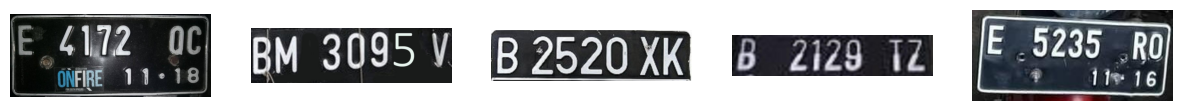

In [19]:
import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/MLimage'

# Dapatkan daftar file citra dalam folder (ambil hanya 5 gambar pertama)
plat_files = os.listdir(folder_path)[:5]

data = []

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    # Gabungkan path folder dengan nama file
    file_path = os.path.join(folder_path, filename)

    # Baca gambar
    img = cv.imread(file_path)

    if img is not None:
        # Ubah ke format RGB
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        data.append(img_rgb)

# Fungsi untuk menampilkan gambar dan informasi
def plot_image(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
        h, w, ch = img.shape
        reshaped_data = img.reshape(h * w, ch)
        print(f"\nInfo for Image {i + 1}:")
        print(f"Width: {w}")
        print(f"Height: {h}")
        print(f"Channels: {ch}")
        print(f"Reshaped Data Shape: {reshaped_data.shape}")
    plt.show()

# Menampilkan gambar dan informasi
plot_image(data)

Scatter Plot

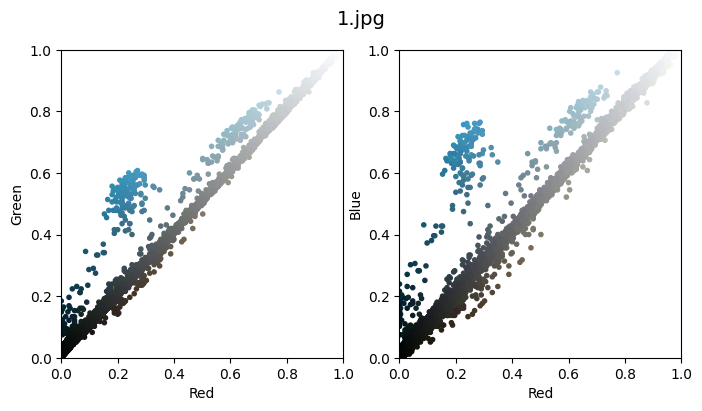

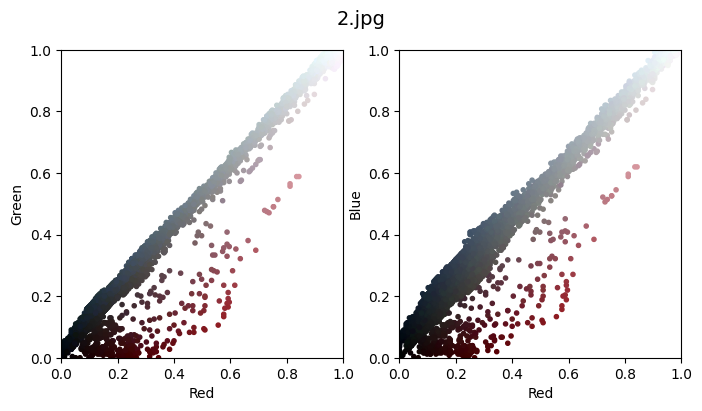

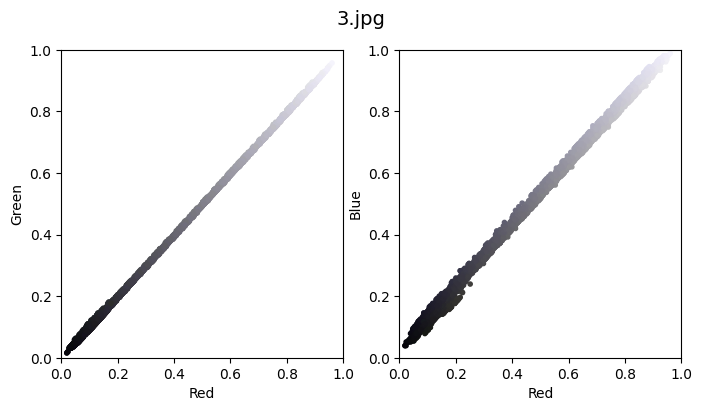

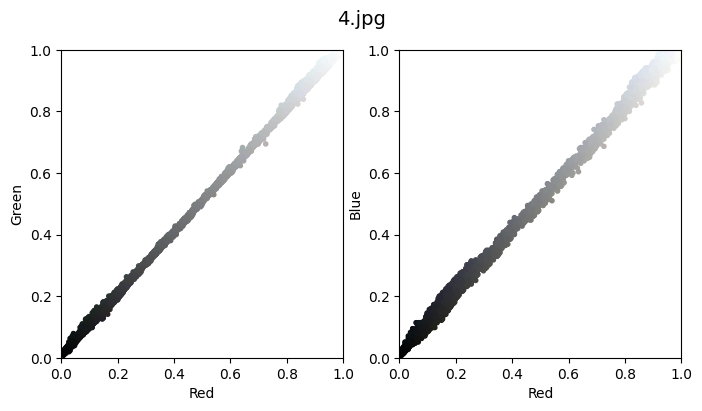

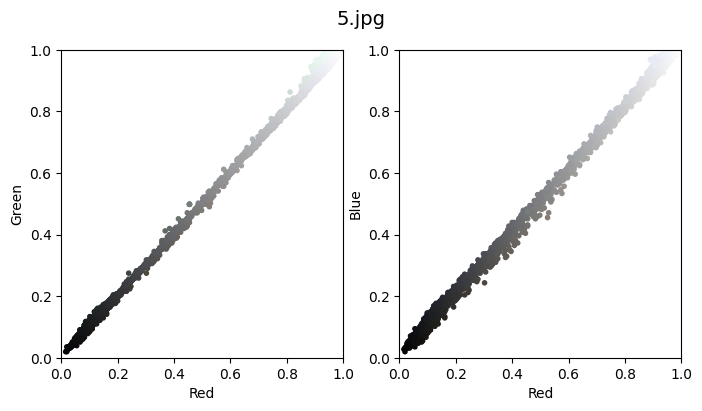

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

# Inisialisasi list untuk menyimpan data gambar
data = []

# Sort plat_files
plat_files.sort()

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            h, w, ch = img_rgb.shape
            img_data = img_rgb / 255.0
            img_data = img_data.reshape(h * w, ch)
            data.append(img_data)

# Menampilkan scatter plot untuk setiap gambar
for i, img_data in enumerate(data):
    plot_pixels(img_data, title=plat_files[i])
    plt.show()


K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

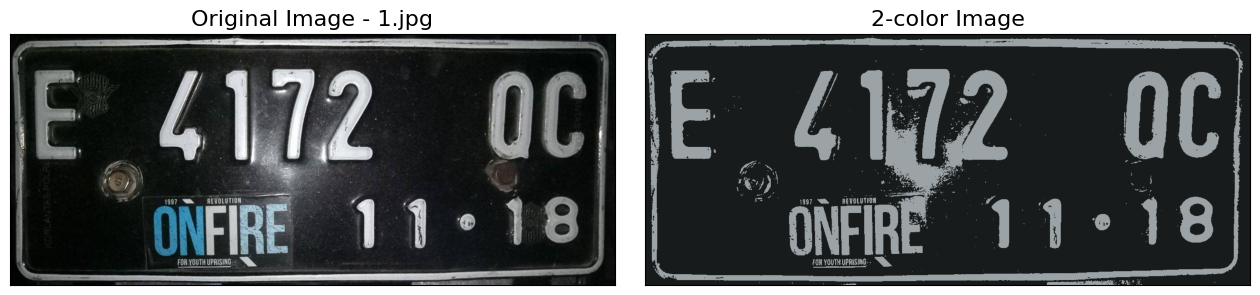

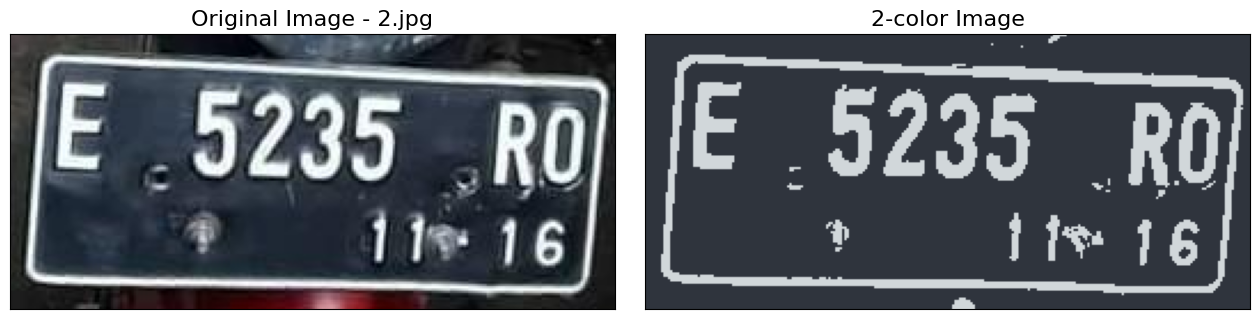

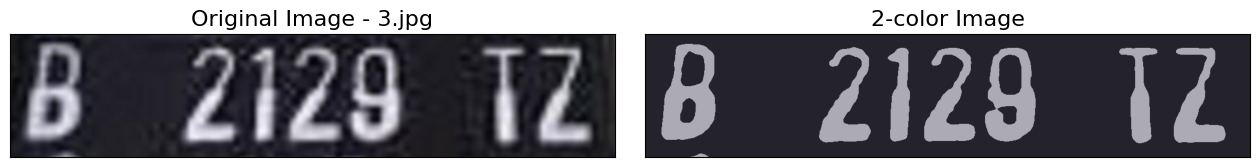

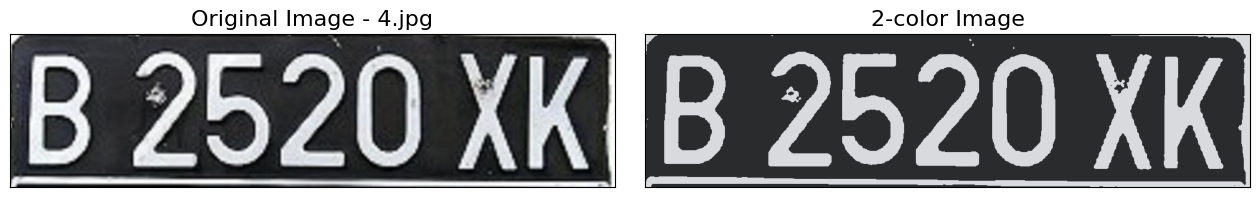

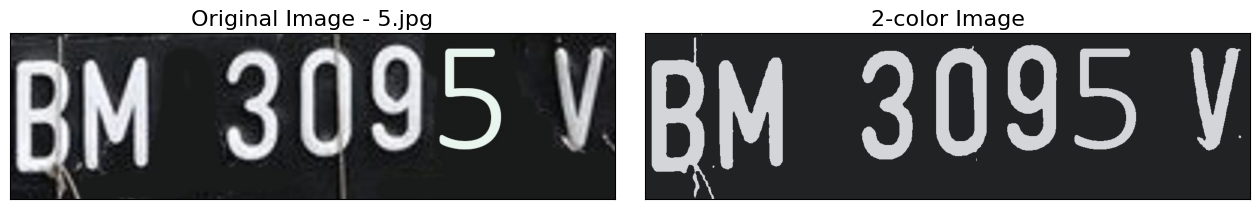

In [26]:
from sklearn.cluster import KMeans

# Inisialisasi list untuk menyimpan data gambar
data = []

# Loop melalui daftar file dan baca setiap gambar
for filename in plat_files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv.imread(file_path)

        if img is not None:
            # Ubah ke format RGB
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            data.append(img_rgb)

# Terapkan K-Means
for img_rgb, filename in zip(data, plat_files):
    h, w, ch = img_rgb.shape
    data = img_rgb.reshape(-1, 3)

    kmeans = KMeans(n_clusters=2, random_state=0)
    clusters = kmeans.fit_predict(data)
    center = kmeans.cluster_centers_
    new_colors = center[clusters].reshape(h, w, ch).astype(np.uint8)

    # Ganti warna citra asli dengan citra yang telah diganti warnanya
    img_recolored = new_colors.reshape(img_rgb.shape)

    # Plot gambar asli dan hasil KMeans
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img_rgb)
    ax[0].set_title('Original Image - ' + filename, size=16)
    ax[1].imshow(img_recolored)
    ax[1].set_title('2-color Image', size=16)

plt.show()


Evaluasi Hasil Segmentasi

In [43]:
pip install pytesseract

In [45]:
import cv2
import pytesseract
import numpy as np
import os

# Path ke folder dataset
folder_path = '/content/drive/MyDrive/Colab Notebooks/MLimage'

# Dapatkan daftar nama file gambar dalam folder dataset
image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Ground Truth license plate characters untuk setiap gambar (sesuaikan sesuai dengan dataset Anda)
ground_truths = ['E 4172 OC', 'E 5235 RO', '', 'B 2129 TZ', 'B 2520 XK', 'BM 3095 V']

for image_file, ground_truth in zip(image_files, ground_truths):
    # Gabungkan path folder dengan nama file gambar
    image_path = os.path.join(folder_path, image_file)

    # Baca gambar
    img = cv2.imread(image_path)

    # Lakukan k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    processed_pixel_vals = img.reshape((-1, 3)).astype(np.float32)
    retval, labels, centers = cv2.kmeans(processed_pixel_vals, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert data into 8-bit values
    centers_img = np.uint8(centers)
    segmented_data = centers_img[labels.flatten()]

    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((img.shape))

    # Perform OCR untuk mengenali karakter
    recognized_text = pytesseract.image_to_string(segmented_image, lang='eng').strip()

    # Hitung akurasi pengenalan karakter
    correct_characters = sum(gt_char == rec_char for gt_char, rec_char in zip(ground_truth, recognized_text))
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0

    # Tampilkan output untuk setiap gambar
    print(f'Image: {image_file}')
    print(f'Ground Truth: {ground_truth}')
    print(f'Recognized Text: {recognized_text}')
    print(f'Character Recognition Accuracy: {accuracy:.2f}%')
    print('---')


TesseractNotFoundError: ignored